In [ ]:
import matplotlib.pyplot as plt

from dataloader import load_patient_task_data_from_txt, clean_and_verify

In [13]:
patient_x_task_y_data = load_patient_task_data_from_txt('001', 3)
patient_x_task_y_data = clean_and_verify(patient_x_task_y_data)

In [14]:
patient_x_task_y_data.head()

,time,RTA,LTA,IO,ECG,RGS,acc_x_waist,acc_y_waist,acc_z_waist,gyro_x_waist,...,gyro_x_arm,gyro_y_arm,gyro_z_arm,SC,acc_x_shank,gyro_x_shank,acc_y_shank,gyro_y_shank,acc_z_shank,gyro_z_shank
0,12:20:09.002,570.5,68.0,9.0,688.0,528.5,6760.442496,320.203026,-5348.796525,-14.491814,...,-349.970896,10.863688,-76.705175,1801.977780,8348.857405,-105.586626,-444.667652,-15.628437,-1221.026712,-3.971165
1,12:20:09.004,549.0,69.0,9.0,645.0,361.5,6757.826990,322.139424,-5343.602500,-13.095197,...,-334.764671,30.269172,-76.023840,1801.930428,8353.867903,-105.146787,-449.769602,-15.228267,-1221.474970,-3.847484
2,12:20:09.006,563.0,44.0,10.0,616.0,253.0,6753.690238,325.574310,-5337.610213,-11.352672,...,-330.072999,51.342812,-77.889917,1801.894187,8357.949698,-104.713636,-453.837725,-14.813877,-1222.209873,-3.638222
3,12:20:09.008,613.0,38.0,11.5,583.5,246.0,6749.568990,330.272797,-5333.011951,-9.806765,...,-332.587552,73.210968,-81.237330,1801.905297,8361.020995,-104.320323,-456.403899,-14.399659,-1223.096516,-3.352639
4,12:20:09.010,703.0,21.5,13.0,581.5,251.0,6747.000000,336.000000,-5332.000000,-9.000000,...,-339.000000,95.000000,-85.000000,1802.000000,8363.000000,-104.000000,-457.000000,-14.000000,-1224.000000,-3.000000


In [11]:
num_fog_labels = len(patient_x_task_y_data[patient_x_task_y_data.label == 1])
print(f'{num_fog_labels} of {len(patient_x_task_y_data)} ({num_fog_labels / len(patient_x_task_y_data) * 100:.2f}%) of timestamps have fog')

65500 of 180500 (36.29%) of timestamps have fog


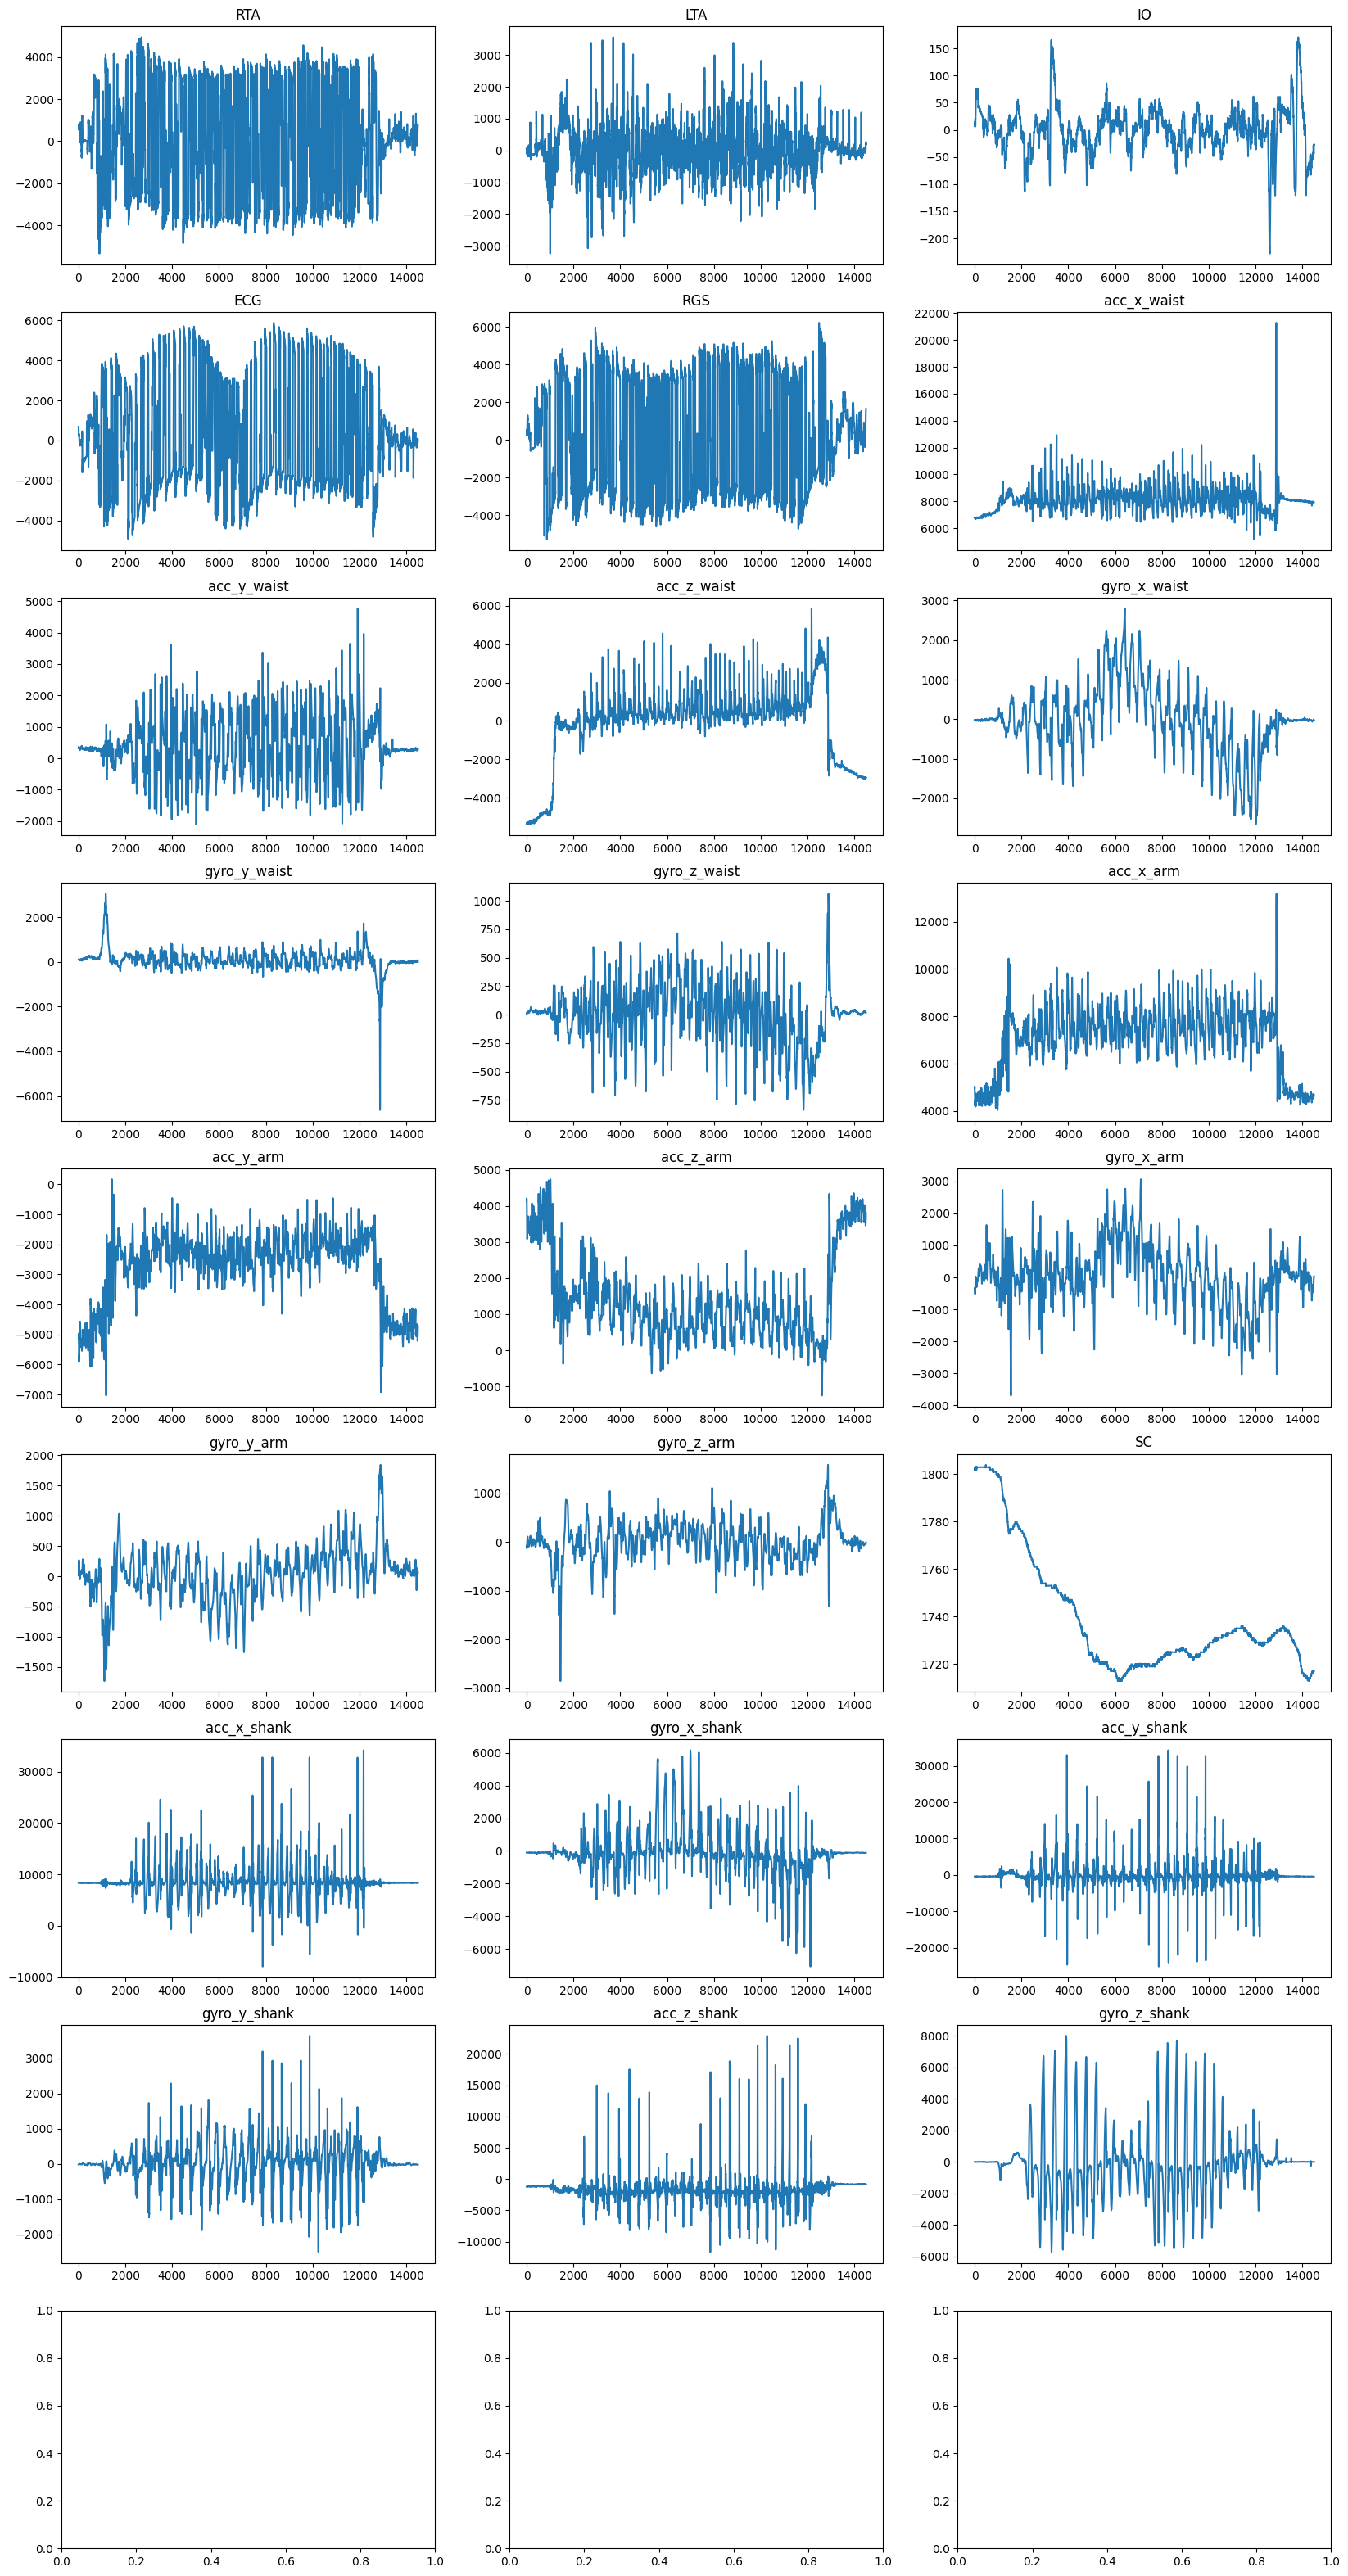

In [15]:
nrows = len(patient_x_task_y_data.columns) // 3 + 1
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 40))

col_idx = 1
for r in range(nrows):
    for c in range(ncols):
        if col_idx == len(patient_x_task_y_data.columns):
            break
            
        patient_x_task_y_data[patient_x_task_y_data.columns[col_idx]].plot(
            ax=axs[r, c],
            title=patient_x_task_y_data.columns[col_idx]
        )
        
        col_idx += 1